In [69]:
from datasets import load_dataset
import pandas as pd

In [70]:
dataset = load_dataset("sentence-transformers/codesearchnet", "pair")

In [71]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['comment', 'code'],
        num_rows: 1375067
    })
})


In [72]:
df = dataset["train"].to_pandas()

In [73]:
df

,comment,code
0,Computes the new parent id for the node being ...,protected function parentId()\n\t{\n\t\tswitch...
1,// SetWinSize overwrites the playlist's window...,func (p *MediaPlaylist) SetWinSize(winsize uin...
2,Show the sidebar and squish the container to m...,function() {\n var options = this.optio...
3,Decide the fate of the cells,def nextGen(self):\n \n self.cur...
4,Return the kind specified by a given __propert...,"def key_to_kind(cls, key):\n \n if key.k..."
...,...,...
1375062,Performs lookup on key and returns appropriate...,private function replaceTokenCallback($matches...
1375063,Returns the content to display on course/overv...,public function get_formatted_content($options...
1375064,对一段文本进行分词，返回list类型的分词结果\n\n Keyword arg...,"def segment(self, text, lower=True, use_stop_w..."
1375065,/* Get all edit-config tags,function(platform) {\n var platform_tag...


In [74]:
df = df[["code", "comment"]]
df

,code,comment
0,protected function parentId()\n\t{\n\t\tswitch...,Computes the new parent id for the node being ...
1,func (p *MediaPlaylist) SetWinSize(winsize uin...,// SetWinSize overwrites the playlist's window...
2,function() {\n var options = this.optio...,Show the sidebar and squish the container to m...
3,def nextGen(self):\n \n self.cur...,Decide the fate of the cells
4,"def key_to_kind(cls, key):\n \n if key.k...",Return the kind specified by a given __propert...
...,...,...
1375062,private function replaceTokenCallback($matches...,Performs lookup on key and returns appropriate...
1375063,public function get_formatted_content($options...,Returns the content to display on course/overv...
1375064,"def segment(self, text, lower=True, use_stop_w...",对一段文本进行分词，返回list类型的分词结果\n\n Keyword arg...
1375065,function(platform) {\n var platform_tag...,/* Get all edit-config tags


In [75]:
df.describe()

,code,comment
count,1375067,1375067
unique,1375067,1204732
top,protected function parentId()\n\t{\n\t\tswitch...,<!-- begin-user-doc -->\n<!-- end-user-doc -->...
freq,1,7541


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375067 entries, 0 to 1375066
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   code     1375067 non-null  object
 1   comment  1375067 non-null  object
dtypes: object(2)
memory usage: 21.0+ MB


In [77]:
df = df.dropna()
df

,code,comment
0,protected function parentId()\n\t{\n\t\tswitch...,Computes the new parent id for the node being ...
1,func (p *MediaPlaylist) SetWinSize(winsize uin...,// SetWinSize overwrites the playlist's window...
2,function() {\n var options = this.optio...,Show the sidebar and squish the container to m...
3,def nextGen(self):\n \n self.cur...,Decide the fate of the cells
4,"def key_to_kind(cls, key):\n \n if key.k...",Return the kind specified by a given __propert...
...,...,...
1375062,private function replaceTokenCallback($matches...,Performs lookup on key and returns appropriate...
1375063,public function get_formatted_content($options...,Returns the content to display on course/overv...
1375064,"def segment(self, text, lower=True, use_stop_w...",对一段文本进行分词，返回list类型的分词结果\n\n Keyword arg...
1375065,function(platform) {\n var platform_tag...,/* Get all edit-config tags


In [78]:
df.head()

,code,comment
0,protected function parentId()\n\t{\n\t\tswitch...,Computes the new parent id for the node being ...
1,func (p *MediaPlaylist) SetWinSize(winsize uin...,// SetWinSize overwrites the playlist's window...
2,function() {\n var options = this.optio...,Show the sidebar and squish the container to m...
3,def nextGen(self):\n \n self.cur...,Decide the fate of the cells
4,"def key_to_kind(cls, key):\n \n if key.k...",Return the kind specified by a given __propert...


In [79]:
df.isnull().sum()

code       0
comment    0
dtype: int64

In [80]:
df['word_count'] = df["comment"].apply(lambda x: len(str(x).split()))

df['word_count'].describe()

count    1.375067e+06
mean     1.492583e+01
std      9.360054e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      2.100000e+01
max      9.300000e+01
Name: word_count, dtype: float64

quality
Average      701250
Poor         355430
Excellent    318387
Name: count, dtype: int64


<Axes: xlabel='quality'>

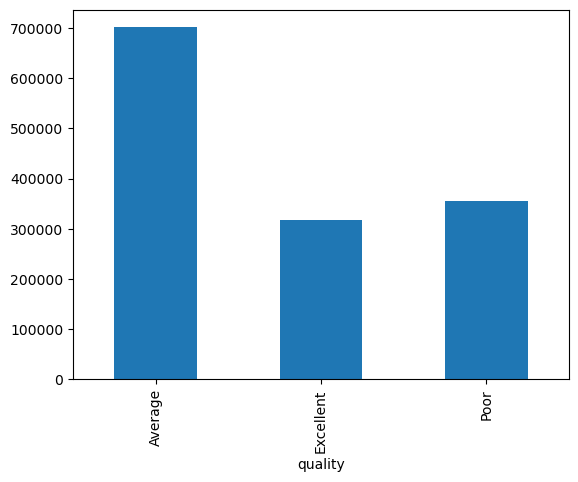

In [81]:
def label_quality(word_count):
    if word_count <= 7:
        return "Poor"
    elif word_count <=21:
        return "Average"
    else:
        return "Excellent"

df['quality'] = df['word_count'].apply(label_quality)
df.head()
print(df['quality'].value_counts())
df.groupby('quality').describe()
df.groupby('quality').size().plot(kind='bar')



In [82]:
import nltk
nltk.download('stopwords')
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text) 
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words] 
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

In [84]:
df['clean_text'] = df['comment'].apply(preprocess_text)
df

,code,comment,word_count,quality,clean_text
0,protected function parentId()\n\t{\n\t\tswitch...,Computes the new parent id for the node being ...,12,Average,computes new parent id node moved return int
1,func (p *MediaPlaylist) SetWinSize(winsize uin...,// SetWinSize overwrites the playlist's window...,7,Poor,setwinsize overwrites playlist window size
2,function() {\n var options = this.optio...,Show the sidebar and squish the container to m...,21,Average,show sidebar squish container make room sideba...
3,def nextGen(self):\n \n self.cur...,Decide the fate of the cells,6,Poor,decide fate cell
4,"def key_to_kind(cls, key):\n \n if key.k...",Return the kind specified by a given __propert...,23,Excellent,return kind specified given property key args ...
...,...,...,...,...,...
1375062,private function replaceTokenCallback($matches...,Performs lookup on key and returns appropriate...,37,Excellent,performs lookup key return appropriate replace...
1375063,public function get_formatted_content($options...,Returns the content to display on course/overv...,33,Excellent,return content display course overview page fo...
1375064,"def segment(self, text, lower=True, use_stop_w...",对一段文本进行分词，返回list类型的分词结果\n\n Keyword arg...,12,Average,list keyword argument lower use stop word true...
1375065,function(platform) {\n var platform_tag...,/* Get all edit-config tags,5,Poor,get edit config tag


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X = tfidf.fit_transform(df['clean_text'])
y = df["quality"]

KeyboardInterrupt: 

In [ ]:
X.shape

(1375067, 5000)

In [ ]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape)
print(X_test.shape)

(1100053, 5000)
(275014, 5000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
from sklearn.metrics import  confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.57      0.94      0.71    140250
   Excellent       0.68      0.19      0.29     63678
        Poor       0.85      0.33      0.48     71086

    accuracy                           0.61    275014
   macro avg       0.70      0.49      0.49    275014
weighted avg       0.67      0.61      0.55    275014



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[131348   5125   3777]
 [ 51311  11970    397]
 [ 47072    447  23567]]


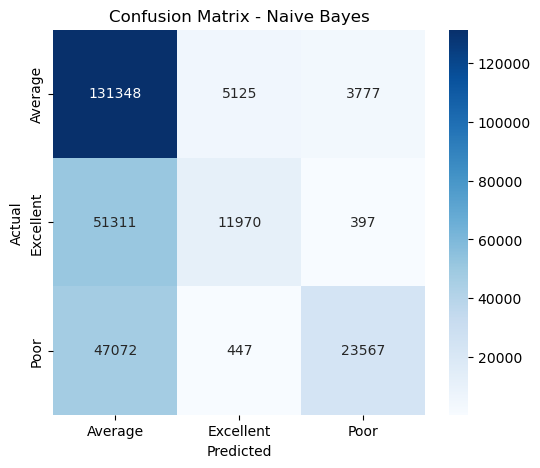

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_model.classes_,
            yticklabels=nb_model.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [ ]:
from scipy.sparse import hstack
import numpy as np

word_count_feature = np.array(df["word_count"]).reshape(-1, 1)

X_combined = hstack([X, word_count_feature])



In [ ]:

good_keywords = [
    "return", "calculate", "compute", "validate", "check",
    "initialize", "convert", "parse", "generate",
    "create", "update", "extract", "handle", "process"
]

# Vague keywords
bad_keywords = [
    "temp", "stuff", "thing", "helper", "test",
    "fix", "misc", "todo", "bug"
]

def semantic_score(text):
    words = text.split()
    word_count = len(words)
    
    if word_count == 0:
        return 0
    
    unique_ratio = len(set(words)) / word_count
    
    good_count = sum(1 for w in words if w in good_keywords)
    bad_count = sum(1 for w in words if w in bad_keywords)
    
    avg_word_len = np.mean([len(w) for w in words])
    
    score = (
        unique_ratio * 2 +
        good_count * 1.5 -
        bad_count * 2 +
        avg_word_len * 0.1
    )
    
    return score

df["semantic_score"] = df["clean_text"].apply(semantic_score)



In [ ]:
df["semantic_score"].describe()

count    1.375067e+06
mean     3.348219e+00
std      1.151353e+00
min     -1.538276e+01
25%      2.544444e+00
50%      3.366667e+00
75%      4.050000e+00
max      1.682308e+01
Name: semantic_score, dtype: float64

In [ ]:
def semantic_label(score):
    if score <= 2.544444:
        return "Poor"
    elif score <= 4.05:
        return "Average"
    else:
        return "Excellent"

df["semantic_quality"] = df["semantic_score"].apply(semantic_label)

df["semantic_quality"].value_counts()


semantic_quality
Average      690934
Poor         343759
Excellent    340374
Name: count, dtype: int64

In [ ]:
y_semantic = df["semantic_quality"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_semantic,
    test_size=0.2,
    random_state=42,
    stratify=y_semantic
)

print(X_train.shape)
print(X_test.shape)


(1100053, 5000)
(275014, 5000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.59      0.90      0.71    138187
   Excellent       0.81      0.37      0.51     68075
        Poor       0.75      0.37      0.50     68752

    accuracy                           0.64    275014
   macro avg       0.72      0.55      0.57    275014
weighted avg       0.69      0.64      0.61    275014



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

models = {
    "Naive Bayes": MultinomialNB(),
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"{name} Accuracy: {acc:.4f}")

print("\nFinal Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")



Training Naive Bayes...
Naive Bayes Accuracy: 0.6372

Final Comparison:
Naive Bayes: 0.6372


In [68]:
import os
import joblib

# Since you only trained Naive Bayes
trained_model = models["Naive Bayes"]

os.makedirs("models", exist_ok=True)

joblib.dump(trained_model, "models/best_model.pkl")
joblib.dump(vectorizer, "models/tfidf_vectorizer.pkl")

print("Model saved in models/ directory")

NameError: name 'vectorizer' is not defined